In [9]:
import os
import pandas as pd

# Initialize an empty list to store dataframes
dfs = []

# Traverse through the directory and subdirectories
path = '/home/box/coding/CTIR/Step_2/Reference_frames/element_coordinates.csv'
# Read the CSV file into a dataframe
df = pd.read_csv(path)  # Skip the first two rows

df = df.round(2)
df

,file,lever_tip_x,lever_tip_y,upper_lever_tip_x,upper_lever_tip_y,stick_head_x,stick_head_y,ball_x,ball_y,sliding_door_x,sliding_door_y,middle_front_x,middle_front_y,middle_back_x,middle_back_y,left_front_x,left_front_y
0,E1_front.png,525.36,446.67,506.80,109.76,261.87,474.28,688.95,439.52,675.83,402.94,308.33,547.63,317.01,402.21,844.89,522.60
1,E1_side.png,808.65,373.74,513.50,66.99,734.33,463.10,759.18,350.62,638.41,350.62,891.28,486.68,256.59,482.78,891.41,380.02
2,E1_top.png,352.30,162.13,348.21,302.43,501.62,201.38,253.07,194.87,254.25,274.80,471.89,122.95,471.34,469.96,182.05,118.33
3,E2_front.png,594.07,446.16,583.69,119.46,329.51,463.98,743.19,446.19,727.62,416.66,366.38,536.87,356.72,401.98,889.03,531.88
4,E2_side.png,790.17,375.81,491.29,94.23,730.67,454.72,743.29,360.61,641.30,365.87,879.53,480.34,246.75,492.33,868.64,394.87
5,E2_top.png,342.84,185.17,326.91,334.09,493.99,217.51,249.76,216.82,252.88,285.31,471.87,144.01,472.18,487.91,182.44,140.09


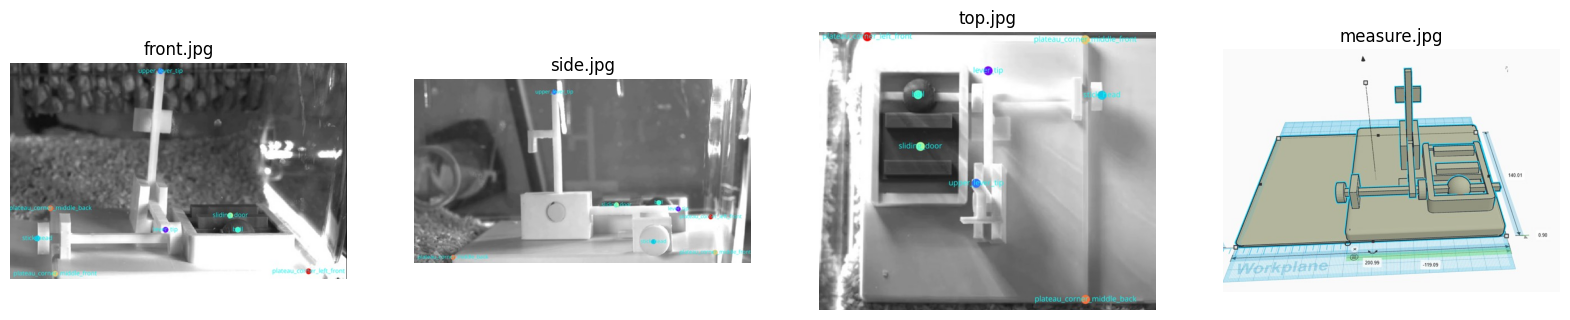

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Define the path to the folder containing images
folder_path = '/home/box/coding/CTIR/Step_2/example'

# List of image filenames
image_filenames = ['front.jpg', 'side.jpg', 'top.jpg', 'measure.jpg']

# Load images
images = [mpimg.imread(os.path.join(folder_path, filename)) for filename in image_filenames]

# Plot images side by side
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for ax, img, filename in zip(axes, images, image_filenames):
    ax.imshow(img)
    ax.axis('off')  # Hide the axis
    ax.set_title(filename)

plt.show()


In [6]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D coordinates of the lockbox parts
lock_box_parts = {
    "middle_front": (0, 0, 0),
    "lever_tip": (49, 24, 15),
    "upper_lever_tip": (49, 87, 82),
    "stick_head": (-9, 35, 9),
    "ball": (86, 34, 15),
    "sliding_door": (86, 67, 10),
    "middle_back": (0, 140, 0),
    "left_front": (120, 0, 0)
}

# DataFrame containing the 2D coordinates
data = {
    'file': ['E1_front.png', 'E1_side.png', 'E1_top.png', 'E2_front.png', 'E2_side.png', 'E2_top.png'],
    'lever_tip_x': [525.36, 808.65, 352.30, 594.07, 790.17, 342.84],
    'lever_tip_y': [446.67, 373.74, 162.13, 446.16, 375.81, 185.17],
    'upper_lever_tip_x': [506.80, 513.50, 348.21, 583.69, 491.29, 326.91],
    'upper_lever_tip_y': [109.76, 66.99, 302.43, 119.46, 94.23, 334.09],
    'stick_head_x': [261.87, 734.33, 501.62, 329.51, 730.67, 493.99],
    'stick_head_y': [474.28, 463.10, 201.38, 463.98, 454.72, 217.51],
    'ball_x': [688.95, 759.18, 253.07, 743.19, 743.29, 249.76],
    'ball_y': [439.52, 350.62, 194.87, 446.19, 360.61, 216.82],
    'sliding_door_x': [675.83, 638.41, 254.25, 727.62, 641.30, 252.88],
    'sliding_door_y': [402.94, 350.62, 274.80, 416.66, 365.87, 285.31],
    'middle_front_x': [308.33, 891.28, 471.89, 366.38, 879.53, 471.87],
    'middle_front_y': [547.63, 486.68, 122.95, 536.87, 480.34, 144.01],
    'middle_back_x': [317.01, 256.59, 471.34, 356.72, 246.75, 472.18],
    'middle_back_y': [402.21, 482.78, 469.96, 401.98, 492.33, 487.91],
    'left_front_x': [844.89, 891.41, 182.05, 889.03, 868.64, 182.44],
    'left_front_y': [522.60, 380.02, 118.33, 531.88, 394.87, 140.09]
}

# Convert dictionary to numpy array
points_3d = np.array(list(lock_box_parts.values()), dtype='float32')

df = pd.DataFrame(data)

# Extract 2D points for the front view (E1_front.png)
points_2d_front = df[['middle_front_x', 'lever_tip_x', 'upper_lever_tip_x', 'stick_head_x', 'ball_x', 'sliding_door_x', 'middle_back_x', 'left_front_x']].iloc[0].values
points_2d_front = np.vstack((points_2d_front, df[['middle_front_y', 'lever_tip_y', 'upper_lever_tip_y', 'stick_head_y', 'ball_y', 'sliding_door_y', 'middle_back_y', 'left_front_y']].iloc[0].values)).T

points_2d_side = df[['middle_front_x', 'lever_tip_x', 'upper_lever_tip_x', 'stick_head_x', 'ball_x', 'sliding_door_x', 'middle_back_x', 'left_front_x']].iloc[1].values
points_2d_side = np.vstack((points_2d_side, df[['middle_front_y', 'lever_tip_y', 'upper_lever_tip_y', 'stick_head_y', 'ball_y', 'sliding_door_y', 'middle_back_y', 'left_front_y']].iloc[1].values)).T

points_2d_top = df[['middle_front_x', 'lever_tip_x', 'upper_lever_tip_x', 'stick_head_x', 'ball_x', 'sliding_door_x', 'middle_back_x', 'left_front_x']].iloc[2].values
points_2d_top = np.vstack((points_2d_top, df[['middle_front_y', 'lever_tip_y', 'upper_lever_tip_y', 'stick_head_y', 'ball_y', 'sliding_door_y', 'middle_back_y', 'left_front_y']].iloc[2].values)).T

# Function to calculate camera parameters
def calculate_camera_params(points_3d, points_2d):
    num_points = points_3d.shape[0]
    A = []
    for i in range(num_points):
        X, Y, Z = points_3d[i]
        u, v = points_2d[i]
        A.append([-X, -Y, -Z, -1, 0, 0, 0, 0, u*X, u*Y, u*Z, u])
        A.append([0, 0, 0, 0, -X, -Y, -Z, -1, v*X, v*Y, v*Z, v])
    A = np.array(A)
    
    # Perform SVD
    U, S, Vt = np.linalg.svd(A)
    P = Vt[-1].reshape(3, 4)
    
    # Decompose P to obtain K, R, t
    K, R, t = cv2.decomposeProjectionMatrix(P)[:3]
    K /= K[2, 2]  # Normalize K to make K[2, 2] = 1
    
    # Correct the sign and orientation if needed
    if np.linalg.det(R) < 0:
        R = -R
        t = -t
    
    return K, R, t, P

# Calculate reprojection error
def calculate_reprojection_error(P, points_3d, points_2d):
    num_points = points_3d.shape[0]
    points_2d_reproj = P @ np.hstack((points_3d, np.ones((num_points, 1)))).T
    points_2d_reproj /= points_2d_reproj[2]  # Divide by the last row to normalize
    points_2d_reproj = points_2d_reproj[:2].T
    reprojection_error = np.mean(np.linalg.norm(points_2d - points_2d_reproj, axis=1))
    return reprojection_error

# Calculate camera parameters and reprojection errors for each view
K_front, R_front, t_front, P_front = calculate_camera_params(points_3d, points_2d_front)
reprojection_error_front = calculate_reprojection_error(P_front, points_3d, points_2d_front)

K_side, R_side, t_side, P_side = calculate_camera_params(points_3d, points_2d_side)
reprojection_error_side = calculate_reprojection_error(P_side, points_3d, points_2d_side)

K_top, R_top, t_top, P_top = calculate_camera_params(points_3d, points_2d_top)
reprojection_error_top = calculate_reprojection_error(P_top, points_3d, points_2d_top)
# Correcting the reshaping of 2D points
points_2d_front = df[['lever_tip_x', 'upper_lever_tip_x', 'stick_head_x', 'ball_x', 'sliding_door_x', 'middle_front_x', 'middle_back_x', 'left_front_x']].iloc[0:1].values
points_2d_front_y = df[['lever_tip_y', 'upper_lever_tip_y', 'stick_head_y', 'ball_y', 'sliding_door_y', 'middle_front_y', 'middle_back_y', 'left_front_y']].iloc[0:1].values
points_2d_front = np.vstack((points_2d_front, points_2d_front_y)).T

points_2d_side = df[['lever_tip_x', 'upper_lever_tip_x', 'stick_head_x', 'ball_x', 'sliding_door_x', 'middle_front_x', 'middle_back_x', 'left_front_x']].iloc[1:2].values
points_2d_side_y = df[['lever_tip_y', 'upper_lever_tip_y', 'stick_head_y', 'ball_y', 'sliding_door_y', 'middle_front_y', 'middle_back_y', 'left_front_y']].iloc[1:2].values
points_2d_side = np.vstack((points_2d_side, points_2d_side_y)).T

points_2d_top = df[['lever_tip_x', 'upper_lever_tip_x', 'stick_head_x', 'ball_x', 'sliding_door_x', 'middle_front_x', 'middle_back_x', 'left_front_x']].iloc[2:3].values
points_2d_top_y = df[['lever_tip_y', 'upper_lever_tip_y', 'stick_head_y', 'ball_y', 'sliding_door_y', 'middle_front_y', 'middle_back_y', 'left_front_y']].iloc[2:3].values
points_2d_top = np.vstack((points_2d_top, points_2d_top_y)).T

# Correcting the triangulate_points function to handle reshaped data
def triangulate_points(points_2d_front, points_2d_side, points_2d_top, P_front, P_side, P_top):
    points_3d = []
    for i in range(points_2d_front.shape[0]):
        A = []
        x, y = points_2d_front[i]
        A.append(x * P_front[2, :] - P_front[0, :])
        A.append(y * P_front[2, :] - P_front[1, :])
        
        x, y = points_2d_side[i]
        A.append(x * P_side[2, :] - P_side[0, :])
        A.append(y * P_side[2, :] - P_side[1, :])
        
        x, y = points_2d_top[i]
        A.append(x * P_top[2, :] - P_top[0, :])
        A.append(y * P_top[2, :] - P_top[1, :])
        
        A = np.array(A)
        _, _, Vt = np.linalg.svd(A)
        X = Vt[-1]
        points_3d.append(X[:3] / X[3])
    return np.array(points_3d)

# Triangulate each point
points_3d_triangulated = triangulate_points(points_2d_front, points_2d_side, points_2d_top, P_front, P_side, P_top)

# Convert to DataFrame for easy viewing
points_3d_df = pd.DataFrame(points_3d_triangulated, columns=['x', 'y', 'z'])

print("front: " + str(reprojection_error_front))
print("side: " + str(reprojection_error_side))
print("top: " + str(reprojection_error_top))
points_3d_triangulated

front: 5.075134302964106
side: 5.684909410764384
top: 1.881206493517923


array([[ 4.92260057e+01,  2.26241015e+01,  1.61366325e+01],
       [ 4.89489354e+01,  8.69125402e+01,  8.18816547e+01],
       [-9.75002620e+00,  3.57454705e+01,  8.95585807e+00],
       [ 8.68300824e+01,  3.55101315e+01,  1.25473861e+01],
       [ 8.55921795e+01,  6.67984918e+01,  1.29692179e+01],
       [ 4.63523296e-01, -2.69654735e-03,  2.84231826e-01],
       [ 1.41947831e-02,  1.40027187e+02, -9.59975459e-01],
       [ 1.19656229e+02, -5.19018438e-01, -7.12708263e-01]])

In [39]:
import deeplabcut
path_config_file = '/home/box/coding/CTIR/Moused-David-2024-05-18/config.yaml'
videofile_path = ['/home/box/coding/CTIR/videos/experiment_1/E1_top.avi'] #Enter the list of videos to analyze.
deeplabcut.analyze_videos(path_config_file,videofile_path, videotype='.avi')

Using snapshot-15000 for model /home/box/coding/CTIR/Moused-David-2024-05-18/dlc-models/iteration-0/MousedMay18-trainset90shuffle1


/home/box/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2024-06-30 16:46:43.663455: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-30 16:46:43.663524: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-30 16:46:43.663540: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA 

Starting to analyze %  /home/box/coding/CTIR/videos/experiment_1/E1_top.avi
Loading  /home/box/coding/CTIR/videos/experiment_1/E1_top.avi
Duration of video [s]:  555.0 , recorded with  30.0 fps!
Overall # of frames:  16650  found with (before cropping) frame dimensions:  968 608
Starting to extract posture


100%|██████████| 16650/16650 [02:58<00:00, 93.49it/s]

Saving results in /home/box/coding/CTIR/videos/experiment_1...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_resnet50_MousedMay18shuffle1_15000'

In [2]:
import pandas as pd

# Path to the HDF5 file
hdf5_path_front = '/home/box/coding/CTIR/videos/experiment_1/E1_frontDLC_resnet101_Moused_2Jul5shuffle1_10000.h5'
hdf5_path_side = '/home/box/coding/CTIR/videos/experiment_1/E1_sideDLC_resnet101_Moused_2Jul5shuffle1_10000.h5'
hdf5_path_top = '/home/box/coding/CTIR/videos/experiment_1/E1_topDLC_resnet101_Moused_2Jul5shuffle1_10000.h5'

# Load the data
data_f = pd.read_hdf(hdf5_path_front)
data_s = pd.read_hdf(hdf5_path_side)
data_t = pd.read_hdf(hdf5_path_top)

columns_to_keep = ['nose']#, 'ear_left', 'ear_right', 'tail_base']

data_f = data_f.loc[:, data_f.columns.get_level_values(1)=="nose"]
data_s = data_s.loc[:, data_s.columns.get_level_values(1)=="nose"]
data_t = data_t.loc[:, data_t.columns.get_level_values(1)=="nose"]

data_f.columns = data_f.columns.droplevel([0,1])
data_s.columns = data_s.columns.droplevel([0,1])
data_t.columns = data_t.columns.droplevel([0,1])

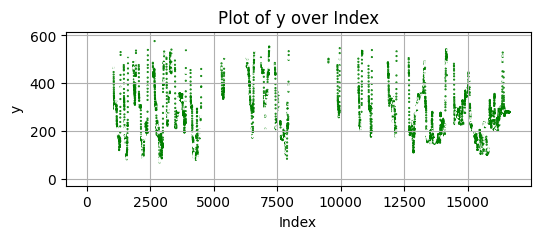

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

colors = ['white' if likelihood < 0.6 else 'green' for likelihood in data_t['likelihood']]


# Plot x over index
plt.figure(figsize=(6, 2))
sc = plt.scatter(data_t.index, data_t['y'], color=colors, s=0.3)
plt.xlabel('Index')
plt.ylabel('y')
plt.title('Plot of y over Index')
plt.grid(True)
plt.show()

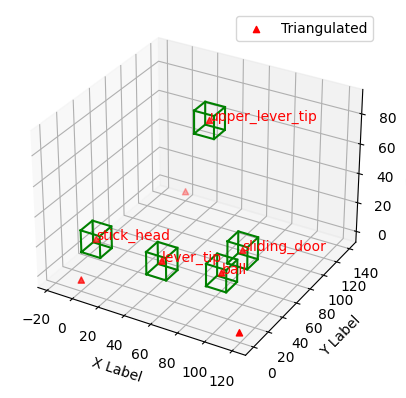

In [7]:
# Calculate square bounding box for each element
def calculate_square_bounding_boxes(points_3d, side_length=15):
    margin = side_length / 2
    bounding_boxes = {}
    for i, part_name in enumerate(["lever_tip", "upper_lever_tip", "stick_head", "ball", "sliding_door"]):
#    for i, part_name in enumerate(["middle_front", "lever_tip", "upper_lever_tip", "stick_head", "ball", "sliding_door", "middle_back", "left_front"]):
        x, y, z = points_3d[i]
        bounding_boxes[part_name] = {
            'x_min': x - margin, 'x_max': x + margin,
            'y_min': y - margin, 'y_max': y + margin,
            'z_min': z - margin, 'z_max': z + margin
        }
    return bounding_boxes

bounding_boxes = calculate_square_bounding_boxes(points_3d_triangulated)
# Visualization with square bounding boxes
def visualize_3d_points_with_square_bounding_boxes(original_points, triangulated_points, bounding_boxes):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for original points
#     ax.scatter(original_points[:, 0], original_points[:, 1], original_points[:, 2], c='b', marker='o', label='Original')

    # Scatter plot for triangulated points
    ax.scatter(triangulated_points[:, 0], triangulated_points[:, 1], triangulated_points[:, 2], c='r', marker='^', label='Triangulated')

    # Labeling the points (assuming the order matches the parts' names)
    part_names = ["lever_tip", "upper_lever_tip", "stick_head", "ball", "sliding_door"]
#    part_names = ["middle_front", "lever_tip", "upper_lever_tip", "stick_head", "ball", "sliding_door", "middle_back", "left_front"]
    for i, txt in enumerate(part_names):
        # ax.text(original_points[i, 0], original_points[i, 1], original_points[i, 2], txt, color='blue')
        ax.text(triangulated_points[i, 0], triangulated_points[i, 1], triangulated_points[i, 2], txt, color='red')
        
        # Plot bounding boxes
        bb = bounding_boxes[txt]
        ax.plot([bb['x_min'], bb['x_max'], bb['x_max'], bb['x_min'], bb['x_min']],
                [bb['y_min'], bb['y_min'], bb['y_max'], bb['y_max'], bb['y_min']],
                [bb['z_min'], bb['z_min'], bb['z_min'], bb['z_min'], bb['z_min']], color='green')
        ax.plot([bb['x_min'], bb['x_max'], bb['x_max'], bb['x_min'], bb['x_min']],
                [bb['y_min'], bb['y_min'], bb['y_max'], bb['y_max'], bb['y_min']],
                [bb['z_max'], bb['z_max'], bb['z_max'], bb['z_max'], bb['z_max']], color='green')
        ax.plot([bb['x_min'], bb['x_min']],
                [bb['y_min'], bb['y_min']],
                [bb['z_min'], bb['z_max']], color='green')
        ax.plot([bb['x_max'], bb['x_max']],
                [bb['y_min'], bb['y_min']],
                [bb['z_min'], bb['z_max']], color='green')
        ax.plot([bb['x_min'], bb['x_min']],
                [bb['y_max'], bb['y_max']],
                [bb['z_min'], bb['z_max']], color='green')
        ax.plot([bb['x_max'], bb['x_max']],
                [bb['y_max'], bb['y_max']],
                [bb['z_min'], bb['z_max']], color='green')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.legend()

    plt.show()

# Call the function to visualize the points with square bounding boxes
visualize_3d_points_with_square_bounding_boxes(points_3d, points_3d_triangulated, bounding_boxes)

/tmp/ipykernel_37589/3352504098.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(df['interaction'].unique()))


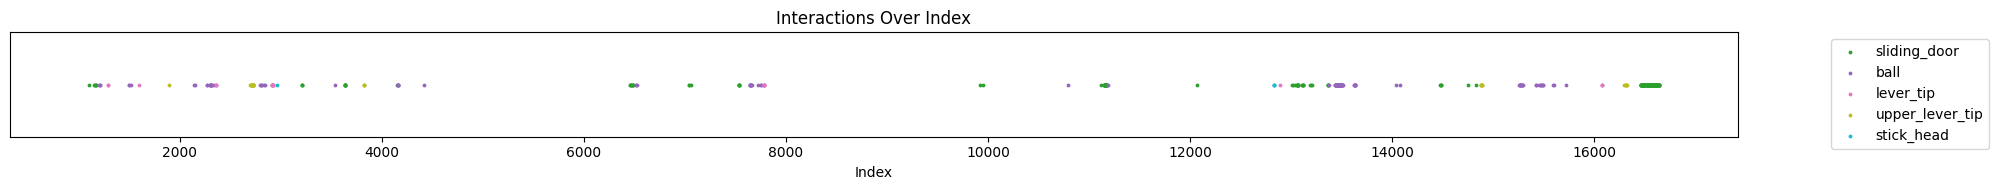

In [8]:
import matplotlib.pyplot as plt
def triangulate_point(p1, p2, p3, P1, P2, P3):
    A = np.array([
        p1[0] * P1[2, :] - P1[0, :],
        p1[1] * P1[2, :] - P1[1, :],
        p2[0] * P2[2, :] - P2[0, :],
        p2[1] * P2[2, :] - P2[1, :],
        p3[0] * P3[2, :] - P3[0, :],
        p3[1] * P3[2, :] - P3[1, :]
    ])
    _, _, V = np.linalg.svd(A)
    X = V[-1]
    X = X / X[3]  # Normalize to make the last coordinate 1
    return X[:3]

# Triangulate points
points_3d = []
for i in range(len(data_f)):
    if data_f.iloc[i]['likelihood'] >= 0.3 or data_s.iloc[i]['likelihood'] >= 0.3 or data_t.iloc[i]['likelihood'] >= 0.3:
        p1 = data_f.iloc[i][['x', 'y']].values
        p2 = data_s.iloc[i][['x', 'y']].values
        p3 = data_t.iloc[i][['x', 'y']].values
        point_3d = triangulate_point(p1, p2, p3, P_front, P_side, P_top)
        points_3d.append(point_3d)
    else:
        points_3d.append([0,0,0])
points_3d = np.array(points_3d)
df = pd.DataFrame(points_3d, columns=['x','y','z'])
df['probable'] = df.apply(lambda row: row.sum() != 0, axis=1)


def check_interaction(row, bounding_boxes):
    if row['x'] + row['y'] + row['z'] == 0:
        return "none"
    for part_name, bounds in bounding_boxes.items():
        if (bounds['x_min'] <= row['x'] <= bounds['x_max'] and
            bounds['y_min'] <= row['y'] <= bounds['y_max'] and
            bounds['z_min'] <= row['z'] <= bounds['z_max']):
            return part_name
    return "none"
df['interaction'] = df.apply(lambda row: check_interaction(row, bounding_boxes), axis=1)

# Plotting
plt.figure(figsize=(20, 2))

# Plot all interactions on the same y-axis
colors = plt.cm.get_cmap('tab10', len(df['interaction'].unique()))

for i, part_name in enumerate(df['interaction'].unique()):
    if part_name != 'none':
        plt.scatter(df.index[df['interaction'] == part_name], [1] * len(df[df['interaction'] == part_name]), label=part_name, color=colors(i), s=3)

plt.xlabel('Index')
plt.yticks([])
plt.title('Interactions Over Index')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

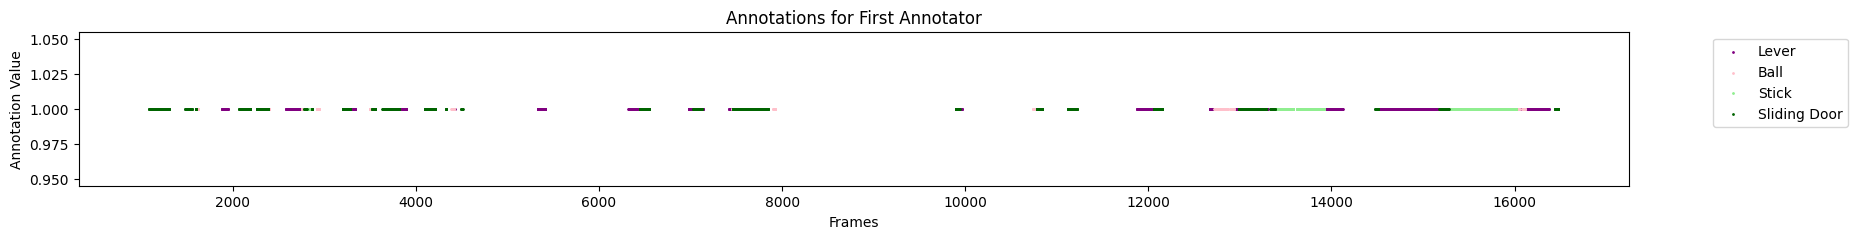

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npz file
data = np.load('/home/box/coding/CTIR/2021-03-05_08-22-05_manual_annotations.npz')

# Extract the ethogram_interactions array
ethogram_interactions = data['ethogram_interactions']

# Extract data for the first annotator
annotator_data = ethogram_interactions[0]

# Frame indices
frames = np.arange(annotator_data.shape[1])

# Extract mechanism data for the first annotator
lever = annotator_data[0, :]
ball = annotator_data[1, :]
stick = annotator_data[2, :]
door = annotator_data[3, :]  # Assuming the door data is in the same position as stick

# Filter out the zero values for plotting
lever_nonzero = lever != 0
ball_nonzero = ball != 0
stick_nonzero = stick != 0
door_nonzero = door != 0

# Plotting
plt.figure(figsize=(20, 2))
plt.scatter(frames[lever_nonzero], lever[lever_nonzero], color='purple', label='Lever', s=1)
plt.scatter(frames[ball_nonzero], ball[ball_nonzero], color='pink', label='Ball', s=1)
plt.scatter(frames[stick_nonzero], stick[stick_nonzero], color='lightgreen', label='Stick', s=1)
plt.scatter(frames[door_nonzero], door[door_nonzero], color='darkgreen', label='Sliding Door', s=1)

plt.xlabel('Frames')
plt.ylabel('Annotation Value')
plt.title('Annotations for First Annotator')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
